In [55]:
import os
import numpy as np
import scipy
from matplotlib import pyplot as plt
import cmath
import random

In [458]:
coeff = np.array([random.randrange(-5,5) for _ in range(6)])

class Polynom:
    def __init__(self, coeff):
        self.coeff = coeff
        self.power = len(coeff) - 1
        
    def __call__(self, x):
        xs = np.array([x ** i for i in range(self.power + 1)])
        return np.dot(xs, self.coeff)
    
    def derive(self, n = 1):
        coeff = self.coeff[:]
        for i in range(n):
            coeff = [j * coeff[j] for j in range(1,6 - i)]
        return Polynom(coeff)
    
poly = Polynom(coeff)
coeff

array([ 1, -2,  1,  4, -5,  1])

In [459]:
def localize(poly):
    step = 0.1
    def localize_f(f, intervals):
        ans = []
        prev = -1e9
        for left, right in intervals:
            if np.sign(f(left)) == np.sign(f(right)):
                continue
            
            while right - left > step:
                mid = (left + right) / 2
                if np.sign(f(mid)) == np.sign(f(left)):
                    left = mid
                else:
                    right = mid
                    
            mid = (left + right) / 2
            ans.append((prev, mid))
            prev = mid
            
        ans.append((prev,1e9))
        return ans
        
    intervals = [(-1e9,1e9)]
    power = poly.power
    for i in range(power - 1, 0, -1):
        intervals = localize_f(poly.derive(i), intervals)
    
    intervals = localize_f(poly, intervals)
    
    return [(mid - step, mid + step) for mid,_ in intervals[1:]]
        
intervals = localize(poly)
intervals

[(-0.8275957621383205, -0.6275957621383206),
 (0.8758878130106601, 1.0758878130106602),
 (3.829017105521449, 4.029017105521449)]

In [460]:
def intervalgen(start, end, n):
    x = start
    step = (end - start) / n
    while x < end:
        yield x
        x += step

In [461]:
def plot(start, end, f):
    xs = list(intervalgen(start,end,1000))
    plt.axhline(0,color='black')
    plt.axvline(0,color='black')
    plt.plot(xs, [f(x) for x in xs])
    plt.gcf().set_size_inches(10,10)

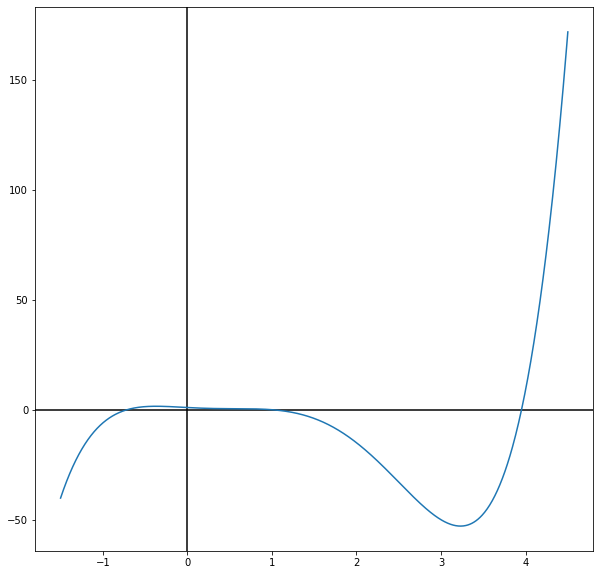

In [464]:
plot(-1.5, 4.5, poly)

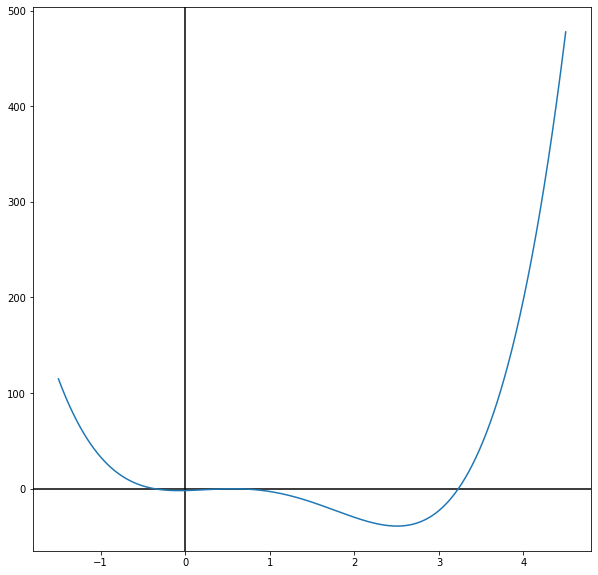

In [466]:
plot(-1.5, 4.5, poly.derive())

In [447]:
def newton_step(x, poly):
    return x - poly(x) / poly.derive()(x)

def newton_method(x, poly, eps = 1e-6):
    prevx = x * 2 + eps * 2
    while abs((x - prevx) / x) > eps or poly(x) > eps:
        prevx = x
        x = newton_step(x, poly)
    return x

In [467]:
def find_roots(poly, intervals):
    roots = []
    for left,right in intervals:
        roots.append(newton_method((left + right) / 2, poly))
    return roots

roots = find_roots(poly, intervals)
roots

[-0.7137154833374212, 1.0, 3.9521774026828798]